In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [4]:
#import data from .csv file of guithub repository
housing = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/Tareq-BD/ECGR-5105/main/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
m = len(housing)
m

545

In [6]:
housing.shape

(545, 13)

In [7]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# split 80% as training set and 20% as testing set
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [9]:
df_test.shape

(109, 13)

In [10]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
22,8050,3,1,1,1,8645000
41,6360,3,2,4,0,7840000
91,6750,2,1,1,2,6419000
118,6420,3,1,1,0,5950000
472,3630,4,1,2,3,3010000


In [11]:
df_Newtrain.shape

(436, 6)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()   # input Normalization
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(10)

,area,bedrooms,bathrooms,stories,parking,price
22,0.432609,0.4,0.000000,0.000000,0.333333,0.596970
41,0.314954,0.4,0.333333,1.000000,0.000000,0.527273
91,0.342105,0.2,0.000000,0.000000,0.666667,0.404242
118,0.319131,0.4,0.000000,0.000000,0.000000,0.363636
472,0.124896,0.6,0.000000,0.333333,1.000000,0.109091
344,0.140212,0.2,0.000000,0.000000,0.000000,0.181818
1,0.495962,0.6,1.000000,1.000000,1.000000,0.909091
257,0.446533,0.4,0.000000,0.000000,0.000000,0.236364
184,0.081036,0.4,0.333333,0.333333,0.000000,0.290909
275,0.152882,0.2,0.000000,0.000000,0.000000,0.222424


In [15]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(10)

,area,bedrooms,bathrooms,stories,parking,price
265,0.088172,0.333333,0.0,0.333333,0.000000,0.248485
54,0.311828,0.333333,0.5,0.333333,0.333333,0.531987
171,0.617849,0.333333,0.0,0.000000,0.333333,0.329966
244,0.263082,0.333333,0.0,0.333333,0.000000,0.262626
268,0.236559,0.666667,0.0,0.333333,0.000000,0.246465
231,0.191398,0.333333,0.0,0.000000,0.000000,0.276094
25,0.350538,0.666667,0.5,0.333333,0.666667,0.646465
169,0.350538,0.666667,0.5,0.333333,0.000000,0.329966
494,0.369176,0.000000,0.0,0.000000,0.000000,0.087542
120,0.350538,0.333333,0.0,0.000000,0.666667,0.397306


In [16]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [17]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking
22,0.432609,0.4,0.000000,0.000000,0.333333
41,0.314954,0.4,0.333333,1.000000,0.000000
91,0.342105,0.2,0.000000,0.000000,0.666667
118,0.319131,0.4,0.000000,0.000000,0.000000
472,0.124896,0.6,0.000000,0.333333,1.000000


In [18]:
y_Newtrain.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [19]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091 0.18181818
 0.90909091 0.23636364 0.29090909 0.22242424]


In [20]:
# preparing the training set

X1 = df_Newtrain.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1)   
X2 = df_Newtrain.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2)          
X3 = df_Newtrain.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3)           
X4 = df_Newtrain.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4)          
X5 = df_Newtrain.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5)

# print first 10 values from each variable

print('X1 = ', X1[: 10]) 
print('X2 = ', X2[: 10])
print('X3 = ', X3[: 10])
print('X4 = ', X4[: 10])
print('X5 = ', X5[: 10])

X1 =  [0.4326093  0.31495405 0.34210526 0.31913116 0.12489557 0.14021164
 0.49596213 0.446533   0.08103592 0.15288221]
X2 =  [0.4 0.4 0.2 0.4 0.6 0.2 0.6 0.4 0.4 0.2]
X3 =  [0.         0.33333333 0.         0.         0.         0.
 1.         0.         0.33333333 0.        ]
X4 =  [0.         1.         0.         0.         0.33333333 0.
 1.         0.         0.33333333 0.        ]
X5 =  [0.33333333 0.         0.66666667 0.         1.         0.
 1.         0.         0.         0.        ]


In [21]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))       # Creating a single column matrix (X_0) of training set size, contains all ones 
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [22]:
# Converting 1D arrays of X1, X2, X3, X4 and X5 to 2D arrays
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)

# print first 5 values from each 2D array
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])
print('X_4 = ', X_4[: 5])
print('X_5 = ', X_5[: 5])

X_1 =  [[0.4326093 ]
 [0.31495405]
 [0.34210526]
 [0.31913116]
 [0.12489557]]
X_2 =  [[0.4]
 [0.4]
 [0.2]
 [0.4]
 [0.6]]
X_3 =  [[0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]]
X_4 =  [[0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.33333333]]
X_5 =  [[0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [1.        ]]


In [23]:
# Stacking X_0, X_1, X_2, X_3, X-4 and X_5 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
X [: 5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        0.33333333],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        0.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        0.66666667],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        ]])

In [24]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [25]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [26]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,parking
265,0.088172,0.333333,0.0,0.333333,0.000000
54,0.311828,0.333333,0.5,0.333333,0.333333
171,0.617849,0.333333,0.0,0.000000,0.333333
244,0.263082,0.333333,0.0,0.333333,0.000000
268,0.236559,0.666667,0.0,0.333333,0.000000


In [27]:
y_Newtest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [28]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [0.24848485 0.53198653 0.32996633 0.26262626 0.24646465 0.27609428
 0.64646465 0.32996633 0.08754209 0.3973064 ]


In [29]:
# preparing the testing/validarion set
X1_test = df_Newtest.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1_test)            
X2_test = df_Newtest.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2_test)            
X3_test = df_Newtest.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3_test)           
X4_test = df_Newtest.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4_test)           
X5_test = df_Newtest.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5_test)

# print first 10 values from each variable

print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])
print('X4_test = ', X4_test[: 10])
print('X5_test = ', X5_test[: 10])

X1_test =  [0.08817204 0.31182796 0.61784946 0.26308244 0.23655914 0.19139785
 0.35053763 0.35053763 0.36917563 0.35053763]
X2_test =  [0.33333333 0.33333333 0.33333333 0.33333333 0.66666667 0.33333333
 0.66666667 0.66666667 0.         0.33333333]
X3_test =  [0.  0.5 0.  0.  0.  0.  0.5 0.5 0.  0. ]
X4_test =  [0.33333333 0.33333333 0.         0.33333333 0.33333333 0.
 0.33333333 0.33333333 0.         0.        ]
X5_test =  [0.         0.33333333 0.33333333 0.         0.         0.
 0.66666667 0.         0.         0.66666667]


In [30]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))     # Creating a single column matrix (X_0_test) of validation set size, contains all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [31]:
# Converting 1D arrays of validation X's to 2D arrays

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)

# print first 5 values from each 2D array
print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])
print('X_3_test = ', X_3_test[: 5])
print('X_4_test = ', X_4_test[: 5])
print('X_5_test = ', X_5_test[: 5])

X_1_test =  [[0.08817204]
 [0.31182796]
 [0.61784946]
 [0.26308244]
 [0.23655914]]
X_2_test =  [[0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.66666667]]
X_3_test =  [[0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
X_4_test =  [[0.33333333]
 [0.33333333]
 [0.        ]
 [0.33333333]
 [0.33333333]]
X_5_test =  [[0.        ]
 [0.33333333]
 [0.33333333]
 [0.        ]
 [0.        ]]


In [32]:
# Stacking X_0_test through X_5_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))
X_test [: 5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        0.33333333],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        0.33333333],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        0.        ]])

In [33]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [35]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta, m)
print('The initial cost for given values of theta_0 to theta_5 = ', cost)

The initial cost for given values of theta_0 to theta_5 =  0.04780662856311236


In [36]:
# defining function for gradient descent algorithm
# gradient descent algorithm is applied on the training set
# for each iteration loss for both training and validation set is calculated

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # loss for training set
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # loss for validation set
    
    return theta, cost_history, cost_test

In [83]:
# We need theta parameter for every input variable. since we have six input variables

theta = [0., 0., 0., 0., 0., 0.]
iterations = 500;
alpha = 0.1

In [84]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [0.0702031  0.28851301 0.08527552 0.25758373 0.14823835 0.11853124]
cost_history = [0.03814982 0.03094333 0.02556292 0.02154339 0.01853811 0.01628876
 0.01460285 0.01333693 0.0123841  0.0116647  0.01111938 0.01070388
 0.01038526 0.01013894 0.0099466  0.00979461 0.00967279 0.00957357
 0.00949129 0.00942174 0.00936178 0.00930907 0.00926186 0.00921885
 0.00917907 0.00914179 0.00910647 0.00907271 0.00904019 0.00900869
 0.00897805 0.00894812 0.00891883 0.00889008 0.00886183 0.00883403
 0.00880666 0.00877967 0.00875306 0.0087268  0.00870089 0.0086753
 0.00865004 0.0086251  0.00860046 0.00857612 0.00855208 0.00852832
 0.00850485 0.00848167 0.00845875 0.00843611 0.00841374 0.00839163
 0.00836978 0.00834818 0.00832684 0.00830574 0.00828489 0.00826428
 0.00824391 0.00822377 0.00820386 0.00818418 0.00816473 0.00814549
 0.00812648 0.00810768 0.00808909 0.00807071 0.00805254 0.00803457
 0.0080168  0.00799923 0.00798185 0.00796467 0.00794768 0.00793087
 0.00791425 0.0078978  0.

Text(0.5, 1.0, 'Convergence of Gradient Descent')

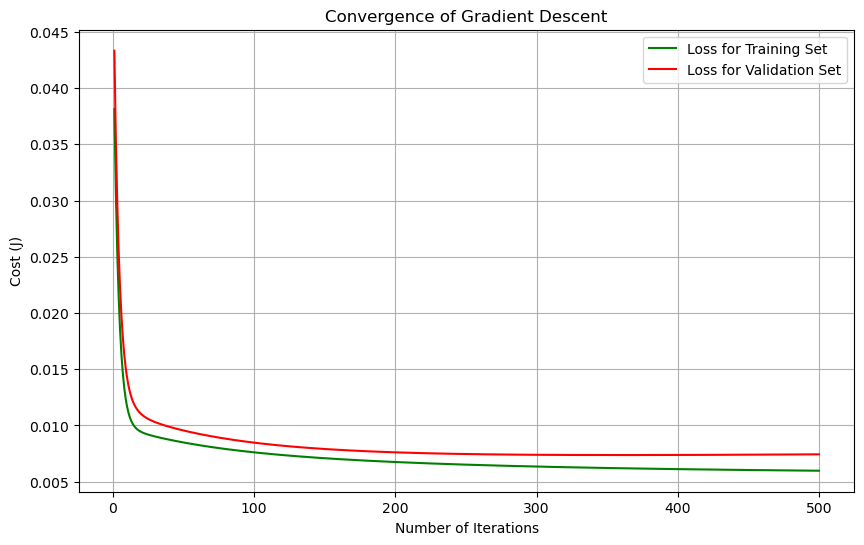

In [85]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')